<a href="https://colab.research.google.com/github/56sarager/Graphene-Classification/blob/main/Graphene_Classifcation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Structure

In [1]:
!pip install gdown --quiet

file_id = "1U37JldmQKrCFXyBsEyuIodbpz5S5HNMP"
output_name = "folder.zip"

download_url = f"https://drive.google.com/uc?id={file_id}"
!gdown {download_url} -O {output_name}

file_id2 = "1lzVP8Hw-icwFibglytB9MJpxG13NhEkQ"
output_name = "graphene.jpg"

download_url = f"https://drive.google.com/uc?id={file_id2}"
!gdown {download_url} -O {output_name}

Downloading...
From (original): https://drive.google.com/uc?id=1U37JldmQKrCFXyBsEyuIodbpz5S5HNMP
From (redirected): https://drive.google.com/uc?id=1U37JldmQKrCFXyBsEyuIodbpz5S5HNMP&confirm=t&uuid=68189727-efda-4d47-9320-c7d02ceebbd4
To: /content/folder.zip
100% 106M/106M [00:00<00:00, 175MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1lzVP8Hw-icwFibglytB9MJpxG13NhEkQ
To: /content/graphene.jpg
100% 5.14k/5.14k [00:00<00:00, 16.8MB/s]


In [2]:
import zipfile
import os

def unzip_file(zip_path, extract_to):
    os.makedirs(extract_to, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    print(f"Extracted all files to {extract_to}")

zip_file_path = '/content/folder.zip'
extraction_directory = 'Graphene Clean Dataset'
unzip_file(zip_file_path, extraction_directory)

Extracted all files to Graphene Clean Dataset


In [4]:
import os
import shutil
import random

# Set paths
original_folder = '/content/Graphene Clean Dataset/Graphene Clean Dataset'
train_folder = '/content/Dataset/train'
test_folder = '/content/Dataset/test'

# Create the necessary directories
os.makedirs(os.path.join(train_folder, 'graphene'), exist_ok=True)
os.makedirs(os.path.join(train_folder, 'non_graphene'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'graphene'), exist_ok=True)
os.makedirs(os.path.join(test_folder, 'non_graphene'), exist_ok=True)

# Get list of all files in the original folder
all_files = os.listdir(original_folder)

# Separate graphene flakes and non-graphene images
graphene_files = [f for f in all_files if f.endswith('f.jpg')]
non_graphene_files = [f for f in all_files if not f.endswith('f.jpg')]

# Shuffle the files for randomness
seed_value = 42
random.seed(seed_value)
random.shuffle(graphene_files)
random.shuffle(non_graphene_files)

if len(graphene_files) < 25 or len(non_graphene_files) < 25:
    raise ValueError("Not enough images in one or both categories to create a balanced test set of 25 each.")

# Split the graphene files into training and testing
test_graphene_files = graphene_files[:25]
train_graphene_files = graphene_files[25:]

# Split the non-graphene files into training and testing
test_non_graphene_files = non_graphene_files[:25]
train_non_graphene_files = non_graphene_files[25:]

def move_files(file_list, src_folder, dest_folder):
    for file in file_list:
        src_path = os.path.join(src_folder, file)
        dest_path = os.path.join(dest_folder, file)

        if os.path.exists(src_path):
            shutil.move(src_path, dest_path)
        else:
            print(f"Warning: {src_path} does not exist.")

move_files(train_graphene_files, original_folder, os.path.join(train_folder, 'graphene'))
move_files(train_non_graphene_files, original_folder, os.path.join(train_folder, 'non_graphene'))

move_files(test_graphene_files, original_folder, os.path.join(test_folder, 'graphene'))
move_files(test_non_graphene_files, original_folder, os.path.join(test_folder, 'non_graphene'))

print("Dataset split completed!")

Dataset split completed!


#Resnet50

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 169MB/s]


Epoch [1/10], Loss: 0.0397
Epoch [2/10], Loss: 0.0239
Epoch [3/10], Loss: 0.0176
Epoch [4/10], Loss: 0.0209
Epoch [5/10], Loss: 0.0125
Epoch [6/10], Loss: 0.0111
Epoch [7/10], Loss: 0.0201
Epoch [8/10], Loss: 0.0122
Epoch [9/10], Loss: 0.0163
Epoch [10/10], Loss: 0.0137
Accuracy: 84.00%
Precision: 0.77
F1 Score: 0.86
AUC: 0.99
Confusion Matrix:
[[35 15]
 [ 1 49]]
Evaluation Runtime: 583.52 seconds


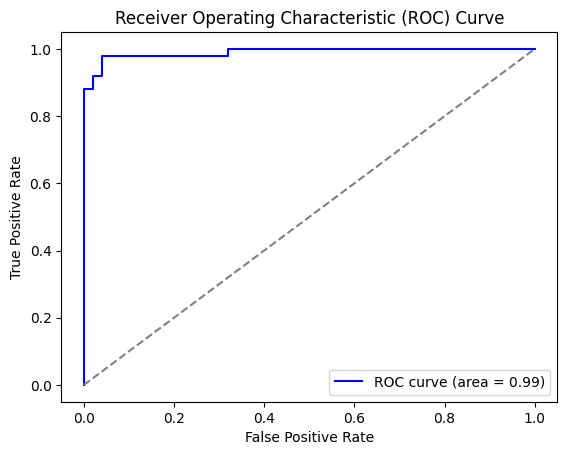

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, auc, confusion_matrix
import time

# Set paths
train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

# Hyperparameters
batch_size = 32
num_epochs = 10
learning_rate = 0.001

# Data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalization based on ImageNet dataset
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained ResNet model
model = models.resnet50(pretrained=True)

# Modify the last layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
start_time = time.time()
# Train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)  # Move to GPU and convert labels to float
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)  # Remove the extra dimension from outputs
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

# Evaluating the model and calculating metrics
model.eval()
all_labels = []
all_predictions = []
all_probabilities = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.float().to(device)
        outputs = model(images)
        probabilities = torch.sigmoid(outputs.squeeze())
        predicted = (probabilities > 0.5).float()  # Sigmoid for binary classification
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probabilities.extend(probabilities.cpu().numpy())

end_time = time.time()
# Convert lists to numpy arrays for metric calculations
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)
all_probabilities = np.array(all_probabilities)

# Calculate metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# ROC curve and AUC
fpr, tpr, _ = roc_curve(all_labels, all_probabilities)
roc_auc = auc(fpr, tpr)

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {roc_auc:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the runtime
runtime = end_time - start_time
print(f'Evaluation Runtime: {runtime:.2f} seconds')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Save the model
torch.save(model.state_dict(), 'graphene_classifier_resnet.pth')

#AlexNet

Epoch [1/10], Loss: 0.1171
Epoch [2/10], Loss: 0.1508
Epoch [3/10], Loss: 0.0492
Epoch [4/10], Loss: 0.0723
Epoch [5/10], Loss: 0.0460
Epoch [6/10], Loss: 0.0269
Epoch [7/10], Loss: 0.0079
Epoch [8/10], Loss: 0.0083
Epoch [9/10], Loss: 0.0121
Epoch [10/10], Loss: 0.0369
Accuracy: 95.00%
Precision: 0.91
F1 Score: 0.95
ROC AUC: 0.97
Confusion Matrix:
 [[45  5]
 [ 0 50]]
Training Runtime: 189.64 seconds


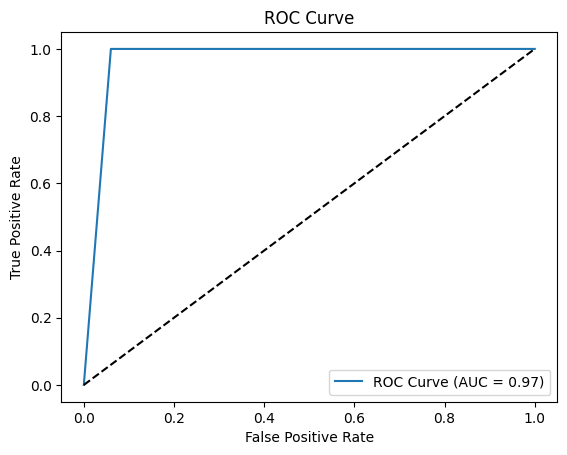

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import time

train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

batch_size = 32
num_epochs = 10
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained AlexNet model
model = models.alexnet(pretrained=True)

# Freeze early layers
for param in model.features.parameters():
    param.requires_grad = False

# Modify last layer for binary classification
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
start_time=time.time()
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.float().to(device)
        outputs = model(images)
        probabilities = torch.sigmoid(outputs.squeeze())
        predicted = (probabilities > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())
end_time=time.time()
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_probs)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:\n', conf_matrix)

runtime = end_time - start_time
print(f'Training Runtime: {runtime:.2f} seconds')

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

torch.save(model.state_dict(), 'graphene_classifier_alexnet.pth')

#VGG

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 62.0MB/s]


Epoch [1/10], Loss: 0.1267
Epoch [2/10], Loss: 0.0605
Epoch [3/10], Loss: 0.1782
Epoch [4/10], Loss: 0.0552
Epoch [5/10], Loss: 0.0854
Epoch [6/10], Loss: 0.0226
Epoch [7/10], Loss: 0.2131
Epoch [8/10], Loss: 0.0511
Epoch [9/10], Loss: 0.0274
Epoch [10/10], Loss: 0.4669
Accuracy: 91.00%
Precision: 0.85
F1 Score: 0.92
ROC AUC: 0.91
Confusion Matrix:
 [[41  9]
 [ 0 50]]
Training Runtime: 418.92 seconds


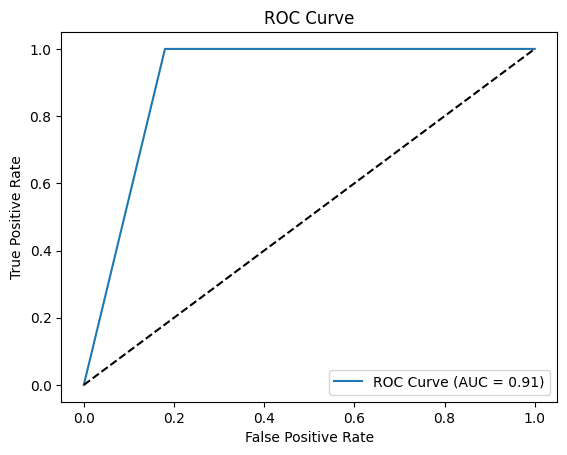

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import time

train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

batch_size = 32
num_epochs = 10
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained VGG model
model = models.vgg16(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, 1)  # Binary classification
model = model.to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
start_time=time.time()
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.float().to(device)
        outputs = model(images)
        probabilities = torch.sigmoid(outputs.squeeze())
        predicted = (probabilities > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())
end_time=time.time()
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_probs)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:\n', conf_matrix)

runtime = end_time - start_time
print(f'Training Runtime: {runtime:.2f} seconds')

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

torch.save(model.state_dict(), 'graphene_classifier_vgg.pth')

#EfficientNet

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 83.4MB/s]


Epoch [1/10], Loss: 0.0395
Epoch [2/10], Loss: 0.0232
Epoch [3/10], Loss: 0.0036
Epoch [4/10], Loss: 0.0089
Epoch [5/10], Loss: 0.0056
Epoch [6/10], Loss: 0.0077
Epoch [7/10], Loss: 0.0196
Epoch [8/10], Loss: 0.0093
Epoch [9/10], Loss: 0.0074
Epoch [10/10], Loss: 0.0043
Accuracy: 89.00%
Precision: 0.82
F1 Score: 0.90
ROC AUC: 0.97
Confusion Matrix:
 [[39 11]
 [ 0 50]]
Training Runtime: 355.70 seconds


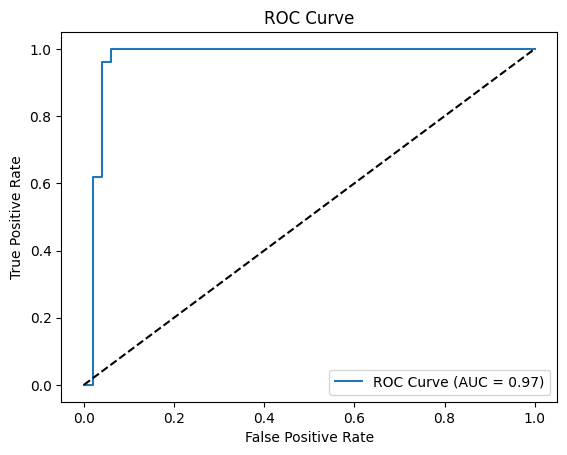

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import time

train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

batch_size = 32
num_epochs = 10
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained EfficientNet model
model = models.efficientnet_b0(pretrained=True)

# Modify the last layer for binary classification
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
start_time=time.time()
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.float().to(device)
        outputs = model(images)
        probabilities = torch.sigmoid(outputs.squeeze())
        predicted = (probabilities > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())
end_time=time.time()
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_probs)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:\n', conf_matrix)

runtime = end_time - start_time
print(f'Training Runtime: {runtime:.2f} seconds')

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

torch.save(model.state_dict(), 'graphene_classifier_efficientnet.pth')

#Inception

In [13]:
!pip cache purge
!pip install --upgrade torch torchvision torchaudio

Files removed: 0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 147MB/s] 


Epoch [1/10], Loss: 0.0449
Epoch [2/10], Loss: 0.0367
Epoch [3/10], Loss: 0.0207
Epoch [4/10], Loss: 0.0162
Epoch [5/10], Loss: 0.0260
Epoch [6/10], Loss: 0.0133
Epoch [7/10], Loss: 0.0124
Epoch [8/10], Loss: 0.0054
Epoch [9/10], Loss: 0.0074
Epoch [10/10], Loss: 0.0053
Accuracy: 96.00%
Precision: 0.93
F1 Score: 0.96
ROC AUC: 1.00
Confusion Matrix:
 [[46  4]
 [ 0 50]]
Training Runtime: 816.22 seconds


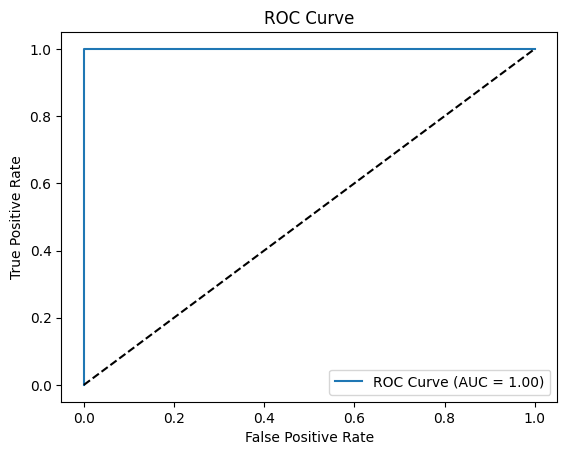

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision import models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import time

train_dir = '/content/Dataset/train'
test_dir = '/content/Dataset/test'

batch_size = 32
num_epochs = 10
learning_rate = 0.001

# Update transforms for InceptionV3 input size (299x299)
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained InceptionV3 model
model = models.inception_v3(pretrained=True)

# Disable auxiliary classifier
model.aux_logits = False

# Modify the last layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.float().to(device)
        outputs = model(images)
        probabilities = torch.sigmoid(outputs.squeeze())
        predicted = (probabilities > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())
end_time = time.time()

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_probs)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:\n', conf_matrix)

runtime = end_time - start_time
print(f'Training Runtime: {runtime:.2f} seconds')

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

torch.save(model.state_dict(), 'graphene_classifier_inception.pth')

#Test Models on Individual Images

##Test AlexNet on Single Image

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-10-3e4a25a10d61>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

The image is classified as: Graphene Flake (Probability: 1.0000)


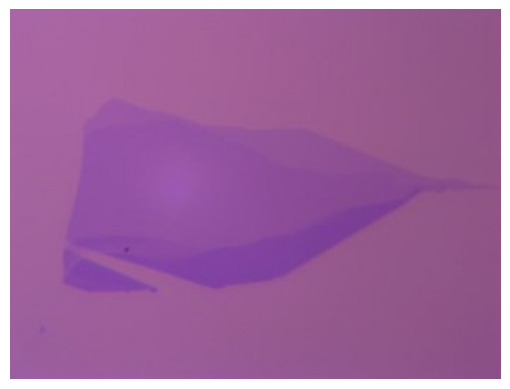

In [10]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the saved model and the image to classify
model_path = 'graphene_classifier_alexnet.pth'
image_path = '/content/graphene.jpg'
#image_path =  input("Path to Image: ")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.alexnet(pretrained=False)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = torch.nn.Linear(num_ftrs, 1)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image_tensor)
    prediction = torch.sigmoid(output).item()

if prediction > 0.5:
    print(f'The image is classified as: Graphene Flake (Probability: {prediction:.4f})')
else:
    print(f'The image is classified as: Not a Graphene Flake (Probability: {1-prediction:.4f})')

plt.imshow(image)
plt.axis('off')
plt.show()

##Test ResNet on Single Image

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the saved model and the image to classify
model_path = 'graphene_classifier_resnet.pth'
image_path = '/content/graphene.jpg'
#image_path =  input("Path to Image: ")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=None)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 1)

model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

try:
    image = Image.open(image_path).convert('RGB')
except Exception as e:
    print(f"Error loading image: {e}")
    exit()

image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image_tensor)
    prediction = torch.sigmoid(output).item()

if prediction < 0.5:
    print(f'The image is classified as: Not a Graphene Flake (Probability: {1-prediction:.4f})')
else:
    print(f'The image is classified as: Graphene Flake (Probability: {prediction:.4f})')

plt.imshow(image)
plt.axis('off')
plt.show()

##Test VGG on Single Image

<ipython-input-11-046a4dffa6e4>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


The image is classified as: Graphene Flake (Probability: 1.0000)


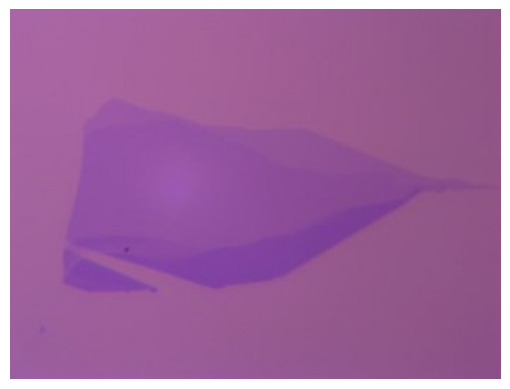

In [11]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the saved model and the image to classify
model_path = 'graphene_classifier_vgg.pth'
image_path = '/content/graphene.jpg'
#image_path =  input("Path to Image: ")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=False)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = torch.nn.Linear(num_ftrs, 1)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image_tensor)
    prediction = torch.sigmoid(output).item()

if prediction > 0.5:
    print(f'The image is classified as: Graphene Flake (Probability: {prediction:.4f})')
else:
    print(f'The image is classified as: Not a Graphene Flake (Probability: {1-prediction:.4f})')

plt.imshow(image)
plt.axis('off')
plt.show()

##Test EfficientNet on Single Image

<ipython-input-12-721e20f035ba>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


The image is classified as: Graphene Flake (Probability: 0.7915)


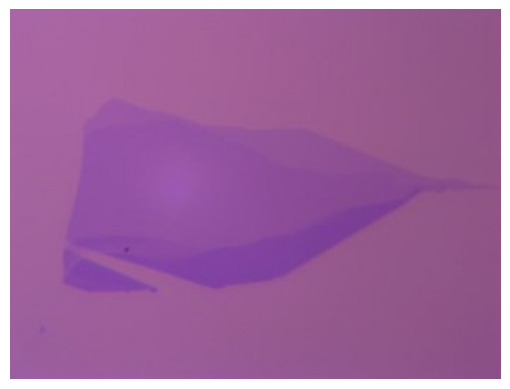

In [12]:
import torch
from torchvision import models, transforms
from PIL import Image

# Define the path to the saved model and the image to classify
model_path = 'graphene_classifier_efficientnet.pth'
image_path = '/content/graphene.jpg'
#image_path =  input("Path to Image: ")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b0(pretrained=False)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = torch.nn.Linear(num_ftrs, 1)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image_tensor)
    prediction = torch.sigmoid(output).item()

if prediction < 0.5:
    print(f'The image is classified as: Graphene Flake (Probability: {1-prediction:.4f})')
else:
    print(f'The image is classified as: Not a Graphene Flake (Probability: {prediction:.4f})')

plt.imshow(image)
plt.axis('off')
plt.show()

##Test Inception on Single Image

In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image

# Define the path to the saved model and the image to classify
model_path = 'graphene_classifier_inception.pth'
image_path = '/content/graphene.jpg'
#image_path =  input("Path to Image: ")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.inception_v3(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)
model.load_state_dict(torch.load(model_path, map_location=device))
model = model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = Image.open(image_path).convert('RGB')
image_tensor = transform(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image_tensor)
    prediction = torch.sigmoid(output).item()

if prediction < 0.5:
    print(f'The image is classified as: Graphene Flake (Probability: {1-prediction:.4f})')
else:
    print(f'The image is classified as: Not a Graphene Flake (Probability: {prediction:.4f})')

plt.imshow(image)
plt.axis('off')
plt.show()